In [ ]:
import pandas as pd

file = '/content/drive/MyDrive/A_model_metrics_comparison.csv'
df = pd.read_csv(file)
df

,train_loss,eval_samples_per_second,folder,eval_runtime,total_flos,epoch,train_runtime,train_samples_per_second,train_steps_per_second,eval_loss,loss,step,eval_steps_per_second,learning_rate,Unnamed: 14
0,NaN,NaN,llama-3-8B-Brazilian Portuguese--1,NaN,NaN,0.03,NaN,NaN,NaN,NaN,2.6051,1,NaN,0.002,NaN
1,NaN,9.780,llama-3-8B-Brazilian Portuguese--1,14.6214,NaN,0.03,NaN,NaN,NaN,1.775035,NaN,1,0.342,NaN,NaN
2,NaN,NaN,llama-3-8B-Brazilian Portuguese--1,NaN,NaN,0.06,NaN,NaN,NaN,NaN,1.8267,2,NaN,0.002,NaN
3,NaN,9.752,llama-3-8B-Brazilian Portuguese--1,14.6630,NaN,0.06,NaN,NaN,NaN,1.424799,NaN,2,0.341,NaN,NaN
4,NaN,NaN,llama-3-8B-Brazilian Portuguese--1,NaN,NaN,0.09,NaN,NaN,NaN,NaN,1.4524,3,NaN,0.002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,NaN,NaN,llama-3-8B-Korean--1full,NaN,NaN,0.71,NaN,NaN,NaN,NaN,0.7891,300,NaN,0.002,NaN
841,NaN,9.508,llama-3-8B-Korean--1full,348.2327,NaN,0.71,NaN,NaN,NaN,0.720995,NaN,300,0.299,NaN,NaN
842,NaN,NaN,llama-3-8B-Korean--1full,NaN,NaN,0.95,NaN,NaN,NaN,NaN,0.7822,400,NaN,0.002,NaN
843,NaN,9.513,llama-3-8B-Korean--1full,348.0415,NaN,0.95,NaN,NaN,NaN,0.705163,NaN,400,0.299,NaN,NaN


In [ ]:
df.dtypes

train_loss                  float64
eval_samples_per_second     float64
folder                       object
eval_runtime                float64
total_flos                  float64
epoch                       float64
train_runtime               float64
train_samples_per_second    float64
train_steps_per_second      float64
eval_loss                   float64
loss                        float64
step                          int64
eval_steps_per_second       float64
learning_rate               float64
Unnamed: 14                  object
dtype: object

In [ ]:
import pandas as pd
import numpy as np

subset_cols = ['folder','step']

# self-join
merged = df.merge(df, how='outer', on=subset_cols, suffixes=(['_x', '_y']))

# new columns
new_cols = {}

for col in df.columns:
    if col in subset_cols:
        print('passed')
        continue

    x_col = col + '_x'
    y_col = col + '_y'

    new_cols[col] = merged[x_col].combine_first(merged[y_col])

# drop original columns
merged = merged.drop(columns= [col + '_x' for col in df.columns if col not in subset_cols] + [col + '_y' for col in df.columns if col not in subset_cols])

# combine new columns with merged DataFrame
nc = pd.DataFrame(new_cols)
merged = pd.concat([merged, nc], axis=1)
filtered_df = merged.dropna(subset=['eval_samples_per_second', 'loss'])

# Drop duplicate rows
deduped_df = filtered_df.drop_duplicates(subset=subset_cols)

# rename for future use
data = deduped_df
data

passed
passed


,folder,step,train_loss,eval_samples_per_second,eval_runtime,total_flos,epoch,train_runtime,train_samples_per_second,train_steps_per_second,eval_loss,loss,eval_steps_per_second,learning_rate,Unnamed: 14
1,llama-3-8B-Brazilian Portuguese--1,1,NaN,9.780,14.6214,NaN,0.03,NaN,NaN,NaN,1.775035,2.6051,0.342,0.002,NaN
5,llama-3-8B-Brazilian Portuguese--1,2,NaN,9.752,14.6630,NaN,0.06,NaN,NaN,NaN,1.424799,1.8267,0.341,0.002,NaN
9,llama-3-8B-Brazilian Portuguese--1,3,NaN,9.756,14.6584,NaN,0.09,NaN,NaN,NaN,1.043082,1.4524,0.341,0.002,NaN
13,llama-3-8B-Brazilian Portuguese--1,4,NaN,9.766,14.6431,NaN,0.12,NaN,NaN,NaN,0.907180,0.9888,0.341,0.002,NaN
17,llama-3-8B-Brazilian Portuguese--1,5,NaN,9.771,14.6351,NaN,0.15,NaN,NaN,NaN,0.833079,0.8247,0.342,0.002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,llama-3-8B-Korean-5000,11,NaN,9.864,14.1936,NaN,1.00,NaN,NaN,NaN,0.633966,0.6086,0.352,0.002,NaN
1745,llama-3-8B-Korean--1full,100,NaN,9.518,347.8596,NaN,0.24,NaN,NaN,NaN,0.790267,0.9653,0.299,0.002,NaN
1749,llama-3-8B-Korean--1full,200,NaN,9.514,348.0051,NaN,0.48,NaN,NaN,NaN,0.740721,0.8373,0.299,0.002,NaN
1753,llama-3-8B-Korean--1full,300,NaN,9.508,348.2327,NaN,0.71,NaN,NaN,NaN,0.720995,0.7891,0.299,0.002,NaN


In [ ]:
# create language and size columns for grouping
data['lang'] = data['folder'].str.split('-').str[3:-1].str.join(' ').str.strip()
data['size'] = data['folder'].str.split('-').str[-1]
data

<ipython-input-4-081cc78daa09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lang'] = data['folder'].str.split('-').str[3:-1].str.join(' ').str.strip()
<ipython-input-4-081cc78daa09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size'] = data['folder'].str.split('-').str[-1]


,folder,step,train_loss,eval_samples_per_second,eval_runtime,total_flos,epoch,train_runtime,train_samples_per_second,train_steps_per_second,eval_loss,loss,eval_steps_per_second,learning_rate,Unnamed: 14,lang,size
1,llama-3-8B-Brazilian Portuguese--1,1,NaN,9.780,14.6214,NaN,0.03,NaN,NaN,NaN,1.775035,2.6051,0.342,0.002,NaN,Brazilian Portuguese,1
5,llama-3-8B-Brazilian Portuguese--1,2,NaN,9.752,14.6630,NaN,0.06,NaN,NaN,NaN,1.424799,1.8267,0.341,0.002,NaN,Brazilian Portuguese,1
9,llama-3-8B-Brazilian Portuguese--1,3,NaN,9.756,14.6584,NaN,0.09,NaN,NaN,NaN,1.043082,1.4524,0.341,0.002,NaN,Brazilian Portuguese,1
13,llama-3-8B-Brazilian Portuguese--1,4,NaN,9.766,14.6431,NaN,0.12,NaN,NaN,NaN,0.907180,0.9888,0.341,0.002,NaN,Brazilian Portuguese,1
17,llama-3-8B-Brazilian Portuguese--1,5,NaN,9.771,14.6351,NaN,0.15,NaN,NaN,NaN,0.833079,0.8247,0.342,0.002,NaN,Brazilian Portuguese,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,llama-3-8B-Korean-5000,11,NaN,9.864,14.1936,NaN,1.00,NaN,NaN,NaN,0.633966,0.6086,0.352,0.002,NaN,Korean,5000
1745,llama-3-8B-Korean--1full,100,NaN,9.518,347.8596,NaN,0.24,NaN,NaN,NaN,0.790267,0.9653,0.299,0.002,NaN,Korean,1full
1749,llama-3-8B-Korean--1full,200,NaN,9.514,348.0051,NaN,0.48,NaN,NaN,NaN,0.740721,0.8373,0.299,0.002,NaN,Korean,1full
1753,llama-3-8B-Korean--1full,300,NaN,9.508,348.2327,NaN,0.71,NaN,NaN,NaN,0.720995,0.7891,0.299,0.002,NaN,Korean,1full


In [ ]:
# removes any DE rows after step 600 due to training instability
filtered_data = data[~((data['lang'] == 'German') & (data['size'] == '1full') & (data['step'] > 600))]
max_step_600_data = data[(data['lang'] == 'German') & (data['size'] == '1full') & (data['step'] <= 600)]

result_data = pd.concat([filtered_data, max_step_600_data])
result_data

,folder,step,train_loss,eval_samples_per_second,eval_runtime,total_flos,epoch,train_runtime,train_samples_per_second,train_steps_per_second,eval_loss,loss,eval_steps_per_second,learning_rate,Unnamed: 14,lang,size
1,llama-3-8B-Brazilian Portuguese--1,1,NaN,9.780,14.6214,NaN,0.03,NaN,NaN,NaN,1.775035,2.6051,0.342,0.002,NaN,Brazilian Portuguese,1
5,llama-3-8B-Brazilian Portuguese--1,2,NaN,9.752,14.6630,NaN,0.06,NaN,NaN,NaN,1.424799,1.8267,0.341,0.002,NaN,Brazilian Portuguese,1
9,llama-3-8B-Brazilian Portuguese--1,3,NaN,9.756,14.6584,NaN,0.09,NaN,NaN,NaN,1.043082,1.4524,0.341,0.002,NaN,Brazilian Portuguese,1
13,llama-3-8B-Brazilian Portuguese--1,4,NaN,9.766,14.6431,NaN,0.12,NaN,NaN,NaN,0.907180,0.9888,0.341,0.002,NaN,Brazilian Portuguese,1
17,llama-3-8B-Brazilian Portuguese--1,5,NaN,9.771,14.6351,NaN,0.15,NaN,NaN,NaN,0.833079,0.8247,0.342,0.002,NaN,Brazilian Portuguese,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,llama-3-8B-German--1full,200,NaN,9.519,1553.4409,NaN,0.11,NaN,NaN,NaN,0.701446,0.7150,0.298,0.002,NaN,German,1full
1175,llama-3-8B-German--1full,300,NaN,9.519,1553.4701,NaN,0.16,NaN,NaN,NaN,0.686437,0.6953,0.298,0.002,NaN,German,1full
1179,llama-3-8B-German--1full,400,NaN,9.517,1553.7538,NaN,0.22,NaN,NaN,NaN,0.674283,0.6824,0.298,0.002,NaN,German,1full
1183,llama-3-8B-German--1full,500,NaN,9.517,1553.8045,NaN,0.27,NaN,NaN,NaN,0.666319,0.6716,0.298,0.002,NaN,German,1full


In [ ]:
# verify type
result_data['size'] = result_data['size'].astype(str)

# Find rows with maximum steps (final step) for each combination of lang and size
idx = result_data.groupby(['lang', 'size'])['step'].idxmax()
print(idx)

# Filter data based on idx
filtered_data = data.loc[idx]
filtered_data

lang                  size 
Brazilian Portuguese  1         129
                      1000      146
                      10000     239
                      1full     342
                      2000      264
                      5000      317
Czech                 1         475
                      1000      492
                      10000     589
                      2000      614
                      5000      667
Finnish               1         808
                      1000      825
                      10000     922
                      1full     972
                      2000      947
                      5000     1021
German                1        1158
                      1000     1248
                      10000    1341
                      1full    1187
                      2000     1366
                      5000     1419
Korean                1        1552
                      1000     1569
                      10000    1662
                      1full    1757


,folder,step,train_loss,eval_samples_per_second,eval_runtime,total_flos,epoch,train_runtime,train_samples_per_second,train_steps_per_second,eval_loss,loss,eval_steps_per_second,learning_rate,Unnamed: 14,lang,size
129,llama-3-8B-Brazilian Portuguese--1,33,NaN,9.747,14.6717,NaN,1.00,NaN,NaN,NaN,0.471396,0.4918,0.341,0.002,NaN,Brazilian Portuguese,1
146,llama-3-8B-Brazilian Portuguese-1000,3,NaN,9.783,14.6174,NaN,1.00,NaN,NaN,NaN,1.070573,1.4922,0.342,0.002,NaN,Brazilian Portuguese,1000
239,llama-3-8B-Brazilian Portuguese-10000,22,NaN,9.772,14.6333,NaN,1.00,NaN,NaN,NaN,0.533737,0.4222,0.342,0.002,NaN,Brazilian Portuguese,10000
342,llama-3-8B-Brazilian Portuguese--1full,500,NaN,9.531,481.6016,NaN,0.87,NaN,NaN,NaN,0.596406,0.6031,0.299,0.002,NaN,Brazilian Portuguese,1full
264,llama-3-8B-Brazilian Portuguese-2000,5,NaN,9.892,14.4567,NaN,1.00,NaN,NaN,NaN,0.828951,0.8271,0.346,0.002,NaN,Brazilian Portuguese,2000
317,llama-3-8B-Brazilian Portuguese-5000,12,NaN,9.867,14.4927,NaN,1.00,NaN,NaN,NaN,0.632484,0.7506,0.345,0.002,NaN,Brazilian Portuguese,5000
475,llama-3-8B-Czech--1,33,NaN,9.757,14.9633,NaN,1.00,NaN,NaN,NaN,0.516879,0.5346,0.334,0.002,NaN,Czech,1
492,llama-3-8B-Czech-1000,3,NaN,9.762,14.9565,NaN,1.00,NaN,NaN,NaN,1.079517,1.5428,0.334,0.002,NaN,Czech,1000
589,llama-3-8B-Czech-10000,23,NaN,9.835,14.8443,NaN,1.00,NaN,NaN,NaN,0.587983,0.6475,0.337,0.002,NaN,Czech,10000
614,llama-3-8B-Czech-2000,5,NaN,9.769,14.9447,NaN,1.00,NaN,NaN,NaN,0.888012,0.9446,0.335,0.002,NaN,Czech,2000


In [ ]:
# add Czech -1full (Training loss 0.56, Eval loss: 0.48)
import numpy as np

filtered_data_2 = filtered_data
new_row = {'lang': 'Czech', 'size': '1full', 'loss': 0.56, 'eval_loss': 0.48}

# verify type
filtered_data_2['size'] = filtered_data_2['size'].astype(str)

# Add the new row
filtered_data_2.loc[len(filtered_data_2)] = [new_row.get(col, np.nan) for col in filtered_data_2.columns]

filtered_data

,folder,step,train_loss,eval_samples_per_second,eval_runtime,total_flos,epoch,train_runtime,train_samples_per_second,train_steps_per_second,eval_loss,loss,eval_steps_per_second,learning_rate,Unnamed: 14,lang,size
129,llama-3-8B-Brazilian Portuguese--1,33.0,NaN,9.747,14.6717,NaN,1.00,NaN,NaN,NaN,0.471396,0.4918,0.341,0.002,NaN,Brazilian Portuguese,1
146,llama-3-8B-Brazilian Portuguese-1000,3.0,NaN,9.783,14.6174,NaN,1.00,NaN,NaN,NaN,1.070573,1.4922,0.342,0.002,NaN,Brazilian Portuguese,1000
239,llama-3-8B-Brazilian Portuguese-10000,22.0,NaN,9.772,14.6333,NaN,1.00,NaN,NaN,NaN,0.533737,0.4222,0.342,0.002,NaN,Brazilian Portuguese,10000
342,llama-3-8B-Brazilian Portuguese--1full,500.0,NaN,9.531,481.6016,NaN,0.87,NaN,NaN,NaN,0.596406,0.6031,0.299,0.002,NaN,Brazilian Portuguese,1full
264,llama-3-8B-Brazilian Portuguese-2000,5.0,NaN,9.892,14.4567,NaN,1.00,NaN,NaN,NaN,0.828951,0.8271,0.346,0.002,NaN,Brazilian Portuguese,2000
317,llama-3-8B-Brazilian Portuguese-5000,12.0,NaN,9.867,14.4927,NaN,1.00,NaN,NaN,NaN,0.632484,0.7506,0.345,0.002,NaN,Brazilian Portuguese,5000
475,llama-3-8B-Czech--1,33.0,NaN,9.757,14.9633,NaN,1.00,NaN,NaN,NaN,0.516879,0.5346,0.334,0.002,NaN,Czech,1
492,llama-3-8B-Czech-1000,3.0,NaN,9.762,14.9565,NaN,1.00,NaN,NaN,NaN,1.079517,1.5428,0.334,0.002,NaN,Czech,1000
589,llama-3-8B-Czech-10000,23.0,NaN,9.835,14.8443,NaN,1.00,NaN,NaN,NaN,0.587983,0.6475,0.337,0.002,NaN,Czech,10000
614,llama-3-8B-Czech-2000,5.0,NaN,9.769,14.9447,NaN,1.00,NaN,NaN,NaN,0.888012,0.9446,0.335,0.002,NaN,Czech,2000


In [ ]:
# Add the training runtime
merged_2 = filtered_data.merge(df[df['train_runtime'].notna()][['folder','step','train_runtime']], on=['folder','step',], how='left')
merged_2 = merged_2[['folder','lang','size','loss','eval_loss','train_runtime_y']]

# sort order
size_order = ['1000', '2000', '5000', '10000', '1', '1full']

# sort
merged_2 = merged_2.assign(size_rank=merged_2['size'].map(dict(zip(size_order, range(len(size_order)))))) \
                   .sort_values(['lang', 'size_rank']) \
                   .drop('size_rank', axis=1)
merged_2

,folder,lang,size,loss,eval_loss,train_runtime_y
1,llama-3-8B-Brazilian Portuguese-1000,Brazilian Portuguese,1000,1.4922,1.070573,68.4602
4,llama-3-8B-Brazilian Portuguese-2000,Brazilian Portuguese,2000,0.8271,0.828951,119.7947
5,llama-3-8B-Brazilian Portuguese-5000,Brazilian Portuguese,5000,0.7506,0.632484,290.1374
2,llama-3-8B-Brazilian Portuguese-10000,Brazilian Portuguese,10000,0.4222,0.533737,551.4190
0,llama-3-8B-Brazilian Portuguese--1,Brazilian Portuguese,1,0.4918,0.471396,820.1985
3,llama-3-8B-Brazilian Portuguese--1full,Brazilian Portuguese,1full,0.6031,0.596406,NaN
7,llama-3-8B-Czech-1000,Czech,1000,1.5428,1.079517,70.4200
9,llama-3-8B-Czech-2000,Czech,2000,0.9446,0.888012,124.1152
10,llama-3-8B-Czech-5000,Czech,5000,0.6643,0.658611,296.0802
8,llama-3-8B-Czech-10000,Czech,10000,0.6475,0.587983,573.8033


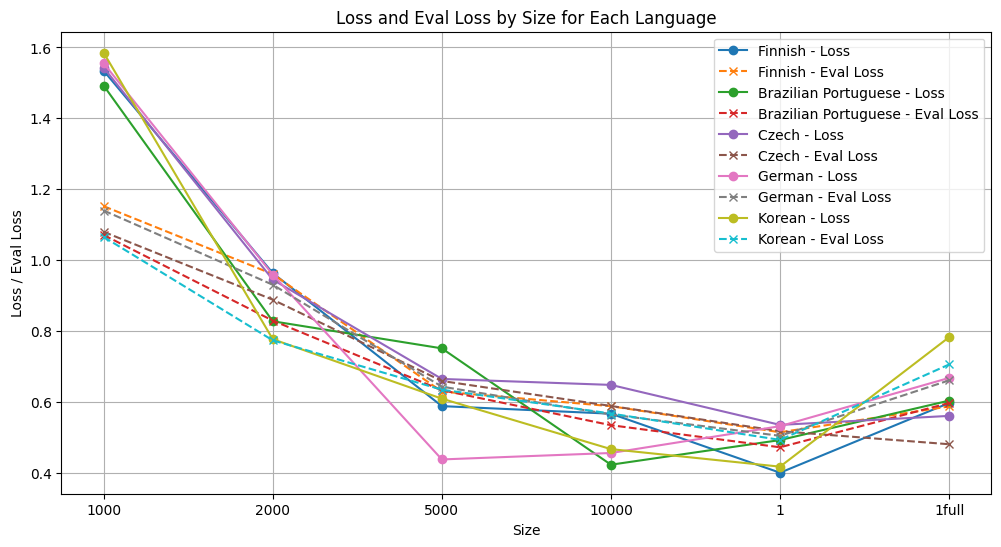

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'size' to string and then to categorical with a specific order
filtered_data['size'] = filtered_data['size'].astype(str)
size_order = ['1000', '2000', '5000', '10000', '1', '1full']
filtered_data['size'] = pd.Categorical(filtered_data['size'], categories=size_order, ordered=True)

filtered_data = filtered_data.sort_values('size')

# Plotting
plt.figure(figsize=(12, 6))

# Plot for each language
for language in filtered_data['lang'].unique():
    lang_data = filtered_data[filtered_data['lang'] == language]
    plt.plot(lang_data['size'], lang_data['loss'], marker='o', label=f'{language} - Loss')
    plt.plot(lang_data['size'], lang_data['eval_loss'], marker='x', linestyle='--', label=f'{language} - Eval Loss')

# Define labels
plt.xlabel('Size')
plt.ylabel('Loss / Eval Loss')
plt.title('Loss and Eval Loss by Size for Each Language')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


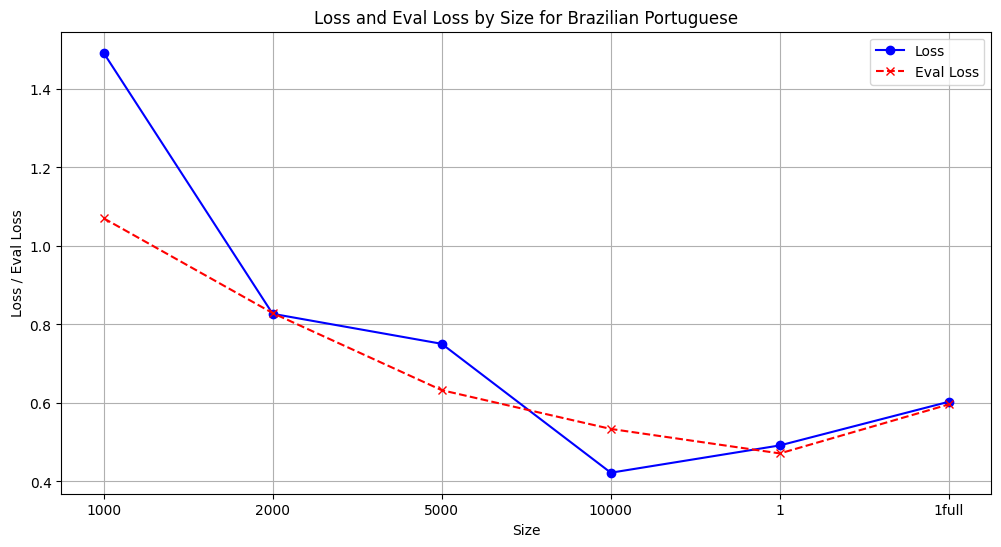

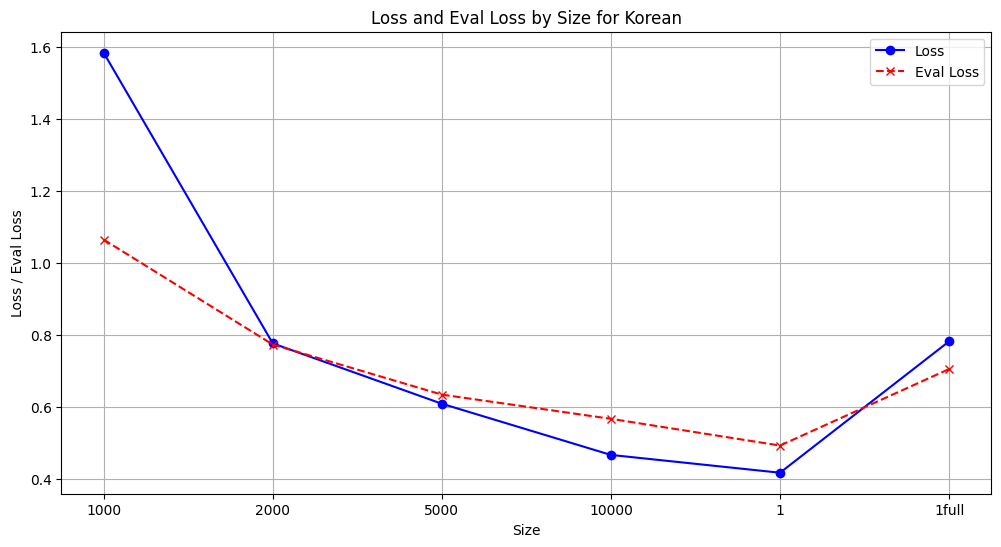

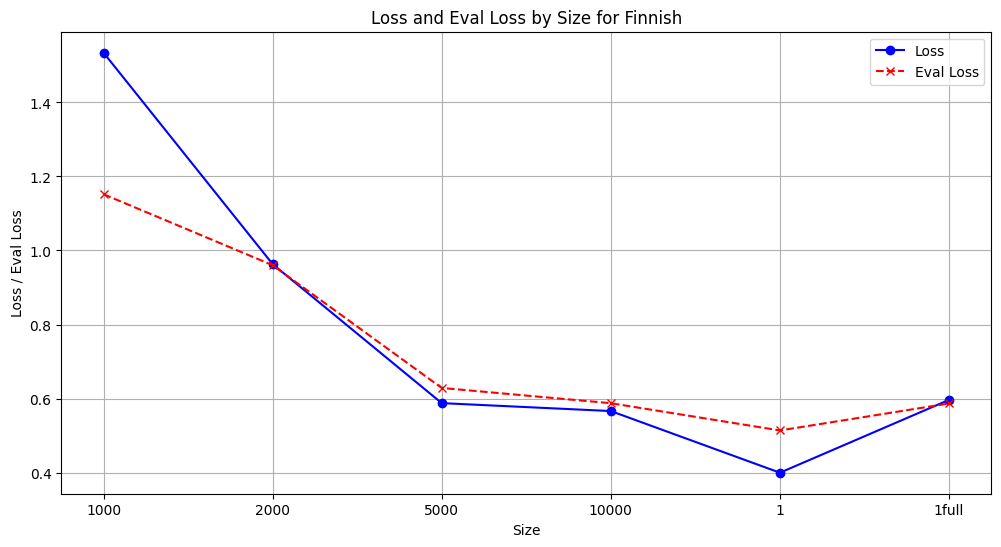

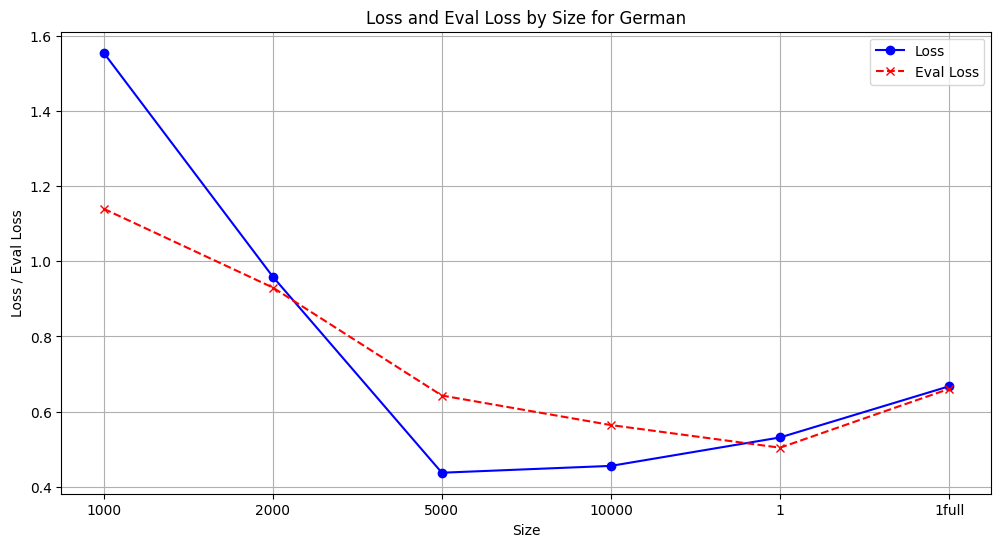

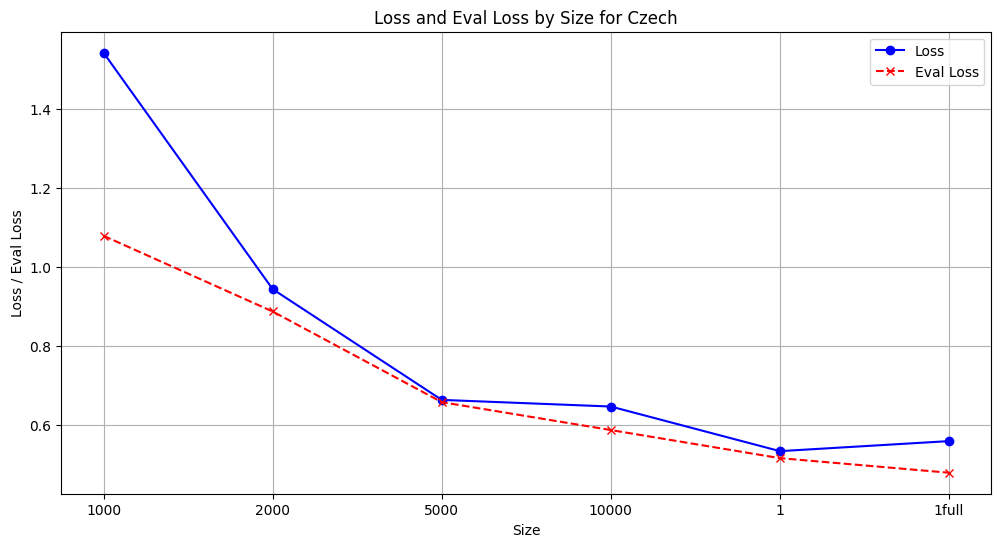

In [ ]:
languages = ['Brazilian Portuguese', 'Korean', 'Finnish', 'German', 'Czech']

for language in languages:
    lang_data = filtered_data[filtered_data['lang'] == language]

    plt.figure(figsize=(12, 6))
    plt.plot(lang_data['size'], lang_data['loss'], marker='o', color='blue', label='Loss')
    plt.plot(lang_data['size'], lang_data['eval_loss'], marker='x', linestyle='--', color='red', label='Eval Loss')

    # Define labels
    plt.xlabel('Size')
    plt.ylabel('Loss / Eval Loss')
    plt.title(f'Loss and Eval Loss by Size for {language}')
    plt.legend()
    plt.grid(True)

    # Display plot
    plt.show()